# Pipeline in Machine Learning
In machine learning, a pipeline is a sequence of data processing steps that are chained together to automate and streamline the machine learning workflow. A pipeline allows you to combine multiple data preprocessing and model training steps into a single object, making it easier to organize and manage your machine learning code.

### **Here are the key components of a pipeline:**

1. **Data Preprocessing Steps:** Pipelines typically start with data preprocessing steps, such as feature scaling, feature encoding, handling missing values, or dimensionality reduction. These steps ensure that the data is in the appropriate format and quality for model training.

2. **Model Training:** After the data preprocessing steps, the pipeline includes the training of a machine learning model. This can be a classifier for classification tasks, a regressor for regression tasks, or any other type of model depending on the problem at hand.

3. **Model Evaluation:** Once the model is trained, the pipeline often incorporates steps for evaluating its performance. This may involve metrics calculation, cross-validation, or any other evaluation technique to assess the model's effectiveness.

4. **Predictions:** After the model has been evaluated, the pipeline allows you to make predictions on new, unseen data using the trained model. This step applies the same preprocessing steps used during training to the new data before generating predictions.

### **The main advantages of using pipelines in machine learning are:**

1. **Simplified Workflow:** Pipelines provide a clean and organized structure for defining and managing the sequence of steps involved in machine learning tasks. This makes it easier to understand, modify, and reproduce the workflow.

2. **Avoiding Data Leakage:** Pipelines ensure that data preprocessing steps are applied consistently to both the training and testing data, preventing data leakage that could lead to biased or incorrect results.

3. **Streamlined Model Deployment:** Pipelines allow you to encapsulate the entire workflow, including data preprocessing and model training, into a single object. This simplifies the deployment of your machine learning model, as the same pipeline can be applied to new data without the need to reapply each individual step.

4. **Hyperparameter Tuning:** Pipelines can be combined with techniques like grid search or randomized search for hyperparameter tuning. This allows you to efficiently explore different combinations of hyperparameters for your models.

### **Summary:**

Overall, pipelines are a powerful tool for managing and automating the machine learning workflow, promoting code reusability, consistency, and efficiency. They help streamline the development and deployment of machine learning models, making it easier to iterate and experiment with different approaches.

In [1]:
# import the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import ML liberaries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
# Choose features (X) and labels (y)
X = df[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = df['survived']

In [5]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [15]:
# Define the column transformer for imputing missing values
numeric_features = ['age', 'fare']
categorical_features = ['pclass', 'sex', 'embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with the preprocessor and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [16]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex',
                                                   'embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [17]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [20]:
# Model evaluation
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n {classification_report(y_test, y_pred)}" )

Accuracy Score: 0.7821229050279329
Confusion Matrix: 
 [[84 21]
 [18 56]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



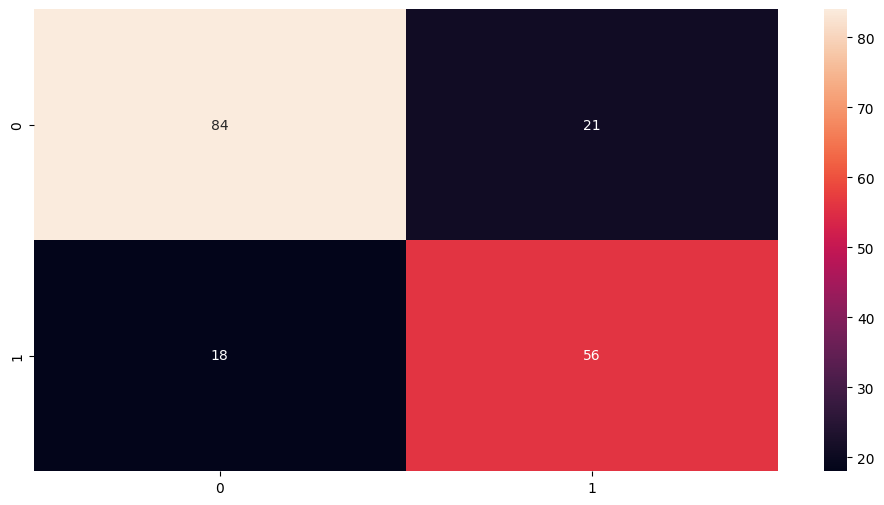

In [23]:
# Let's plot confusion matrix
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

### Explaination:

In this example, we start by loading the Titanic dataset from Seaborn using sns.load_dataset('titanic'). We then select the relevant features and target variable (survived) to train our model. Next, we split the data into training and test sets using train_test_split from scikit-learn.

The pipeline is created using the Pipeline class from scikit-learn. It consists of three steps:

Data preprocessing step: The SimpleImputer is used to handle missing values by replacing them with the most frequent value in each column.

Feature encoding step: The OneHotEncoder is used to encode categorical variables (sex and embarked) as binary features.

Model training step: The RandomForestClassifier is used as the machine learning model for classification.

We then fit the pipeline on the training data using pipeline.fit(X_train, y_train). Afterward, we make predictions on the test data using pipeline.predict(X_test).

Finally, we calculate the accuracy score by comparing the predicted values (y_pred) with the actual values (y_test).